In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def define_figure(xlabel="X",ylabel="Y"):
    # setup plot parameters
    fig = plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=20)
    ax.set_ylabel(ylabel,size=20)
    plt.tick_params(axis='both',labelsize=20)
    return ax

# Harmonic Oscillator

*Statement of the problem:* consider a mass $m$ connected to a spring with force constant $k$.  The mass is allowed to oscillate under the force of this spring and at temperature $T$.  Compute the energy of this spring using both classical and quantum mechanics. 

## Classical Mechanics

This is a one dimensional problem with a mass $m$ on a spring at temperature $T$.  We can express the energy of such a system using classical mechanics as:

$E(x) = K(x) + V(x) = \frac{1}{2}mv^2 + \frac{1}{2}kx^2$

## Quantum Mechanics

### Aside: Operator Commutator Relation

Operators do not necessarily commute.  We define a commutator quantity between two operators as

$[\hat{A},\hat{B}] = \hat{A}\hat{B} - \hat{B}\hat{A}$.

If this quantity is zero, $\hat{A}$ and $\hat{B}$ commute.  If it is nonzero, they do not commute.

Example: Let $\hat{A} = \frac{d}{dx}$ and $\hat{B} = x^2$.  Evaluate $[\hat{A},\hat{B}]$.

### Back to the problem at hand:

Much like in the case of classical mechanics, we must define the energy of the system for quantum mechanics.  The Hamiltonian is defined as the kinetic energy operator plus the harmonic potential operator  

$\hat{H} = \hat{K} + \hat{V} = -\frac{\hbar^2}{2\mu}\frac{d^2}{dx^2} + \frac{1}{2}kx^2 = \frac{\hat{P}^2}{2\mu} + \frac{k}{2}\hat{X}^2$.

Note that we have introduced the reduced mass, $\mu$, instead of the mass, $m$.  This is to make the problem applicable to situations like a diatomic molecule in which case we must deal with the reduced mass of the molecule rather than the mass of a single particle. 

We now plug this into the Schrodinger equation:

$\hat{H}\psi(x) = E\psi(x)$

$\left(\frac{\hat{P}^2}{2\mu} + \frac{k}{2}\hat{X}^2\right)\psi(x) = E \psi(x)$.

We need to solve the above equation for $\psi(x)$ and $E$.  This is not as easy as the Particle in a Box situation - as in we cannot just come up with functions that are solutions of the above equation.  There are at least two ways to solve this problem analytically.  This is a differential equation and different forms of these equations are solved in different ways.  In this case, there is a (sometimes referred to as elegant) operator solution that we will go through to get $\psi(x)$ and $E$.

The following "derivation" will follow closely that given in the Appendix of Chapter 5 of McQuarrie "Quantum Chemistry" second edition.  We start by defining two new operators $\hat{p}$ and $\hat{x}$ as

$\hat{p} = (\mu\hbar\omega)^{-1/2}\hat{P}$,

$\hat{x} = (\mu\hbar\omega)^{1/2}\hat{X}$

These allow us to write the Hamiltonian as

$\hat{H} = \frac{\hbar\omega}{2}(\hat{p}^2+ \hat{x}^2) $.



We now define two new operators (non-Hermitian)

$\hat{a}_+ = \frac{1}{\sqrt{2}}(\hat{x}-i\hat{p})$, 

$\hat{a}_- = \frac{1}{\sqrt{2}}(\hat{x}+i\hat{p})$.

Using these definitions,

$\hat{a}_+\hat{a}_- = \frac{1}{2}(\hat{x}-i\hat{p})(\hat{x}+i\hat{p}) = \frac{1}{2}\left[ \hat{x}^2 + i(\hat{p}\hat{x}-\hat{x}\hat{p}) + \hat{p}^2\right] = \frac{1}{2}(\hat{x}^2 + \hat{p}^2 + 1)$

and 

$\hat{a}_-\hat{a}_+ = \frac{1}{2}(\hat{p}^2 + \hat{x}^2 - 1)$.

Note that this implies $[\hat{a}_+,\hat{a}_-] = -1$ (these operators do not commute).  Other important commutation relations of these operators are

$[\hat{a}_+\hat{a}_-,\hat{a}_+] = \hat{a}_+$

and 

$[\hat{a}_+\hat{a}_-,\hat{a}_-] = -\hat{a}_-$.

The Hamiltonian can now be written in terms of $\hat{a}_+$ and $\hat{a}_-$ as

$\hat{H} = \hbar\omega\left(\hat{a}_+\hat{a}_- + \frac{1}{2}\right)$.

At this juncture all we have done is rewrite the Hamiltonian in terms of operators $\hat{a}_+$ and $\hat{a}_-$.  Let's investigate some of the properties of these operators by manipulating the Schrodinger equation

$\hat{H}|\nu\rangle = \hbar \omega \left(\hat{a}_+\hat{a}_- + \frac{1}{2}\right)|\nu\rangle = E_\nu|\nu\rangle $.

Now left multiply by $\hat{a}_-$

$\hbar \omega \left(\hat{a}_-\hat{a}_+\hat{a}_- + \frac{\hat{a}_-}{2}\right)|\nu\rangle = \hbar \omega \left(\hat{a}_-\hat{a}_+ + \frac{1}{2}\right)\hat{a}_-|\nu\rangle = E_\nu\hat{a}_-|\nu\rangle $.

Notice that, inside the parantheses of the middle term we have $\hat{a}_-\hat{a}_+$ not $\hat{a}_+\hat{a}_-$ as it is in the Hamiltonian.  We can, however, plug in $\hat{a}_-\hat{a}_+=\frac{1}{2}(\hat{x}^2 + \hat{p}^2 + 1)$ and rearrange to get back the original Hamiltonian.  We start by plugging in for $\hat{a}_-\hat{a}_+$

$\hbar \omega \left(\hat{a}_-\hat{a}_+ + \frac{1}{2}\right)|\hat{a}_-\nu\rangle = \frac{\hbar\omega}{2}(\hat{p}^2+\hat{x}^2+2)|\hat{a}_-\nu\rangle = E_\nu|\hat{a}_-\nu\rangle $.

Now we almost have the Hamiltonian on the left hand side but just need to subtract $\hbar\omega$ from both sides to get:

$\frac{\hbar\omega}{2}(\hat{p}^2+\hat{x}^2)|\hat{a}_-\nu\rangle = \hat{H}|\hat{a}_-\nu\rangle = (E_\nu-\hbar\omega)|\hat{a}_-\nu\rangle $.

Note that this equation tells us that $|\hat{a}_-\nu\rangle$ is an eigenfunction of $\hat{H}$ that has an eigenvalue of $E_\nu-\hbar\omega$.  This means that state $|\hat{a}_-\nu\rangle$ has an energy that is one unit of $\hbar\omega$ less than the energy of $|\nu\rangle$.  Thus we must have

$|\hat{a}_-\nu\rangle \propto |\nu-1\rangle$.

Similarly, it can be shown that

$|\hat{a}_+\nu\rangle \propto |\nu+1\rangle$.

We have as of yet only rewritten the Hamiltonian in terms of the ladder operators and shown properties of the ladder operators.  We still need to determine the energies and wavefunctions of Schrodinger equation for this problem.  It should be noted, however, that having rewritten the Hamiltonian in terms of ladder operators, eigenfunctions and energies of the Hamiltonian are also eigenfunctions and values of the operator $\hat{a}_+\hat{a}_-$.  We start our investigation of this operator by invesigating $\hat{a}_-|\nu\rangle$.  We note that there must be a minimum $\nu$ such that

$\hat{a}_-|\nu_{min}\rangle = 0$.

If we multiply the above equation by $\hat{a}_+$ we get

$\hat{a}_+\hat{a}_-|\nu_{min}\rangle = 0 = n_{min}|\nu_{min}\rangle$.

Thus, $n_{min}=0$, or the lowest quantum state of the Harmonic oscillator is $n=0$.  It can be shown that repeated applications of the raising operator $\hat{a}_+$ on the above equation give $n=0,1,2,...$.  

$[\hat{a}_+\hat{a}_-,\hat{a}_+]|\psi_n\rangle = \hat{a}_+|\psi_n\rangle$

$\Rightarrow \hat{a}_+\hat{a}_-\hat{a}_+|\psi_n\rangle - \hat{a}_+\hat{a}_+\hat{a}_-|\psi_n\rangle = \hat{a}_+|\psi_n\rangle$

$\Rightarrow \hat{a}_+\hat{a}_-\hat{a}_+|\psi_n\rangle  = \hat{a}_+\hat{a}_+\hat{a}_-|\psi_n\rangle + \hat{a}_+|\psi_n\rangle$

$\Rightarrow \hat{a}_+\hat{a}_-\hat{a}_+|\psi_n\rangle  = (n+1)\hat{a}_+|\psi_n\rangle$

Plugging this result into the Hamiltonian expression above gives

$E_n = \hbar\omega\left(n+\frac{1}{2}\right)$.

Now for the wavefunctions.  We start with 

$\hat{a}_-|\psi_0\rangle = 0$.  

We now plug in the expression for $\hat{a}_-$ to get

$\frac{1}{\sqrt{2}}(\hat{x}+i\hat{p})\psi_0 = 0$.

If we distribute $\psi_0$ and rearrange we get

$ -\hat{x}\psi_0 = i\hat{p}\psi_0$.

Plugging in for $\hat{x}$ and $\hat{p}$ we now get

$ -\frac{\mu\omega}{\hbar}x\psi_0 = \frac{d\psi_0}{dx}$.

The solution to this equation is

$\psi_0(x) = ce^{-\mu\omega x^2/2\hbar}$.

The general solution to the harmonic oscillator quantum mechanical Hamiltonian is given on page 225 of McQuarrie

$\psi_n(x) = N_{n}H_n(\alpha^{1/2}x)e^{-\alpha x^2/2}$

where

$N_{n} = \frac{1}{(2^nn!)^{1/2}}\left(\frac{\alpha}{\pi}\right)^{1/4}$

and $H_n(x)$ are Hermite polynomials,

$H_n(x) = (-1)^ne^{x^2}\frac{d^n}{dx^n}\left(e^{-x^2}\right)$.

/var/folders/td/dll8n_kj4vd0zxjm0xd9m7740000gq/T/ipykernel_19765/2702552940.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')


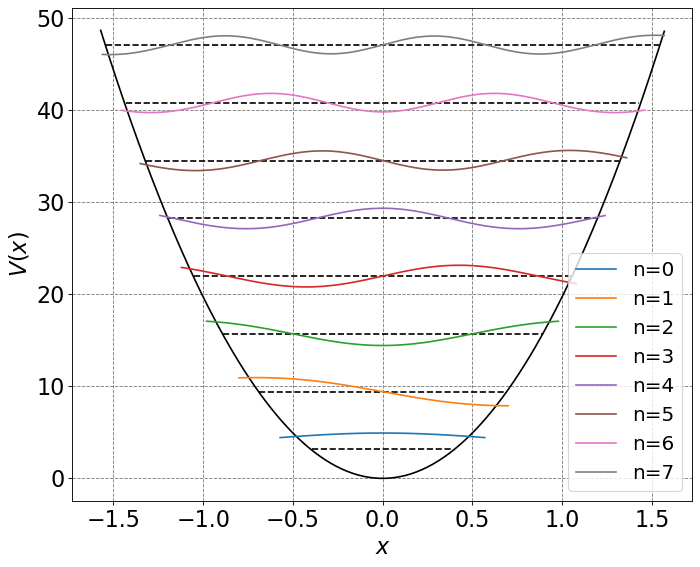

In [3]:
# let's plot the energy levels and wave functions
from scipy.special import hermite
from scipy.special import factorial
from scipy import integrate
# start by defining N function
def Nn(n,alpha):
    return 1/np.sqrt(2**n*factorial(n))*(alpha/np.pi)**0.25

# initialize a figure
ax = define_figure(xlabel="$x$",ylabel="$V(x)$")
hbar = 1.0
omega = 2*np.pi
alpha = omega/np.pi
x = np.arange(-np.pi/2.0,np.pi/2.0,0.01)
x2 = np.power(x,2)
U = 0.5 * (omega)**2 * x**2
ax.plot(x, U, 'k')
A = 2
for n in range(8):
    # compute and plot energy levels
    evals = hbar*omega*(n+0.5)
    mask = np.where(evals > U)  
    ax.plot(x[mask], evals * np.ones(np.shape(x))[mask], 'k--')
    # compute and plot wavefunctions
    psi =A * (-1)**n*Nn(n,alpha)*hermite(n)(np.sqrt(alpha)*x)*np.exp(-alpha*x2/2.0)
    Y = psi+evals  # shift wavefunction up in Y to be at energy level
    label = "n="+str(n)
    mask = np.where(Y > U-2.0)
    ax.plot(x[mask], Y[mask].real,label=label)
plt.legend(fontsize=18)